![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)
# **Counting Circles, Ellipses and Finding Waldo**

####**In this lesson we'll learn:**
1. Mini Project on using Template Matching to find Waldo

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 12):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


# **Finding Waldo Using Template Matching**

#### **Notes on Template Matching**

There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag **cv2.TM_CCOEFF.**

So what exactly is the cv2.matchTemplate function doing?
Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is. 

Regions with sufficiently high correlation can be considered “matches” for our waldo template.
From there, all we need is a call to cv2.minMaxLoc on Line 22 to find where our “good” matches are.
That’s really all there is to template matching!

## -----------------------------

Xo'sh, cv2.matchTemplate funksiyasi aynan nima qiladi?
Aslini olganda, bu funksiya Waldo so'rovi tasvirining "surma oynasini" oladi va uni jumboq tasvirimiz bo'ylab chapdan o'ngga va yuqoridan pastga, bir vaqtning o'zida bir pikselga siljitadi. Keyin, ushbu joylarning har biri uchun moslik qanchalik "yaxshi" yoki "yomon" ekanligini aniqlash uchun korrelyatsiya koeffitsientini hisoblaymiz.

Etarli darajada yuqori korrelyatsiyaga ega bo'lgan hududlar bizning valdo shablonimiz uchun "mos" deb hisoblanishi mumkin.
U yerdan bizga “yaxshi” mosliklarimiz qayerdaligini bilish uchun 22-qatordagi cv2.minMaxLoc ga chaqirish kifoya.
Shablonlarni moslashtirish uchun hammasi shu!



http://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html      

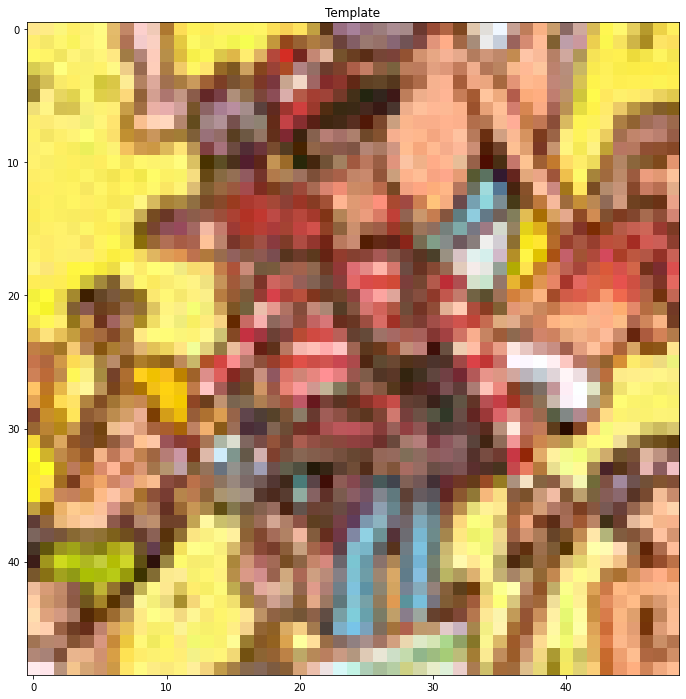

In [4]:
#Topilishi kerak bo'lgan kichik rasm
template = cv2.imread('Datasets/images/waldo.jpg')
imshow('Template', template)

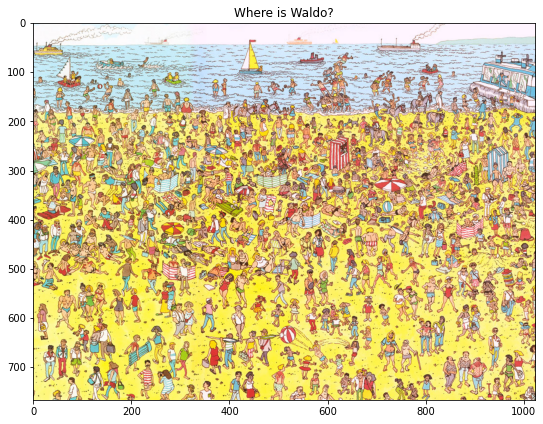

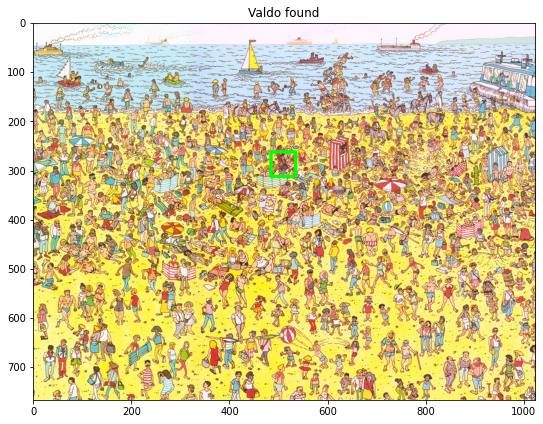

In [24]:
# Load input image and convert to grayscale
image = cv2.imread('Datasets/images/WaldoBeach.jpg') #Asosiy katta rasm
imshow('Where is Waldo?', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('Datasets/images/waldo.jpg',0)  #topilishi kerak bo'lgan qism, template 
        #rasmlar ikkalasi ham gray bolishi kerak
result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result) #template matchinga doir funksiya 

#Create bbox
top_left = max_loc #rectangle point. Max location bu starting x,y ni beadi
bottom_right = (top_left[0]+50, top_left[1]+50) #50 bbox ending pointni aniqlayapmiz start x,y orqali 50 qoshib
cv2.rectangle(image, top_left, bottom_right, (0,255,0),5)


imshow('Valdo found', image)

In [25]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result) 

## 2- experiment

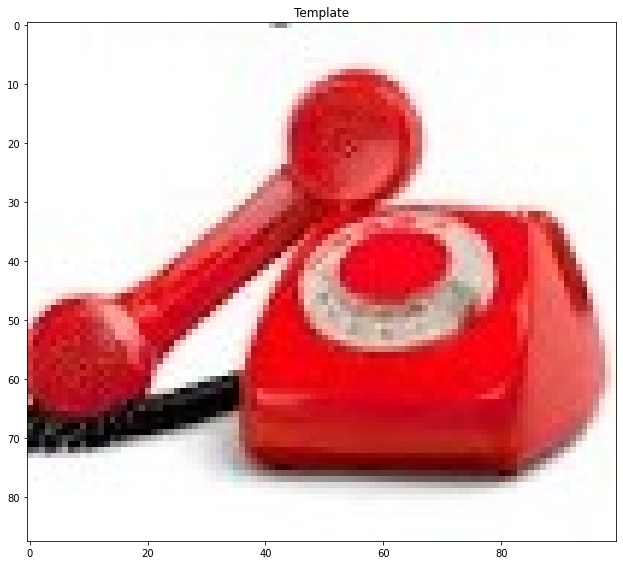

In [26]:
#Topilishi kerak bo'lgan kichik rasm
template = cv2.imread('Datasets/images/cropped_phone.jpg')
imshow('Template', template)

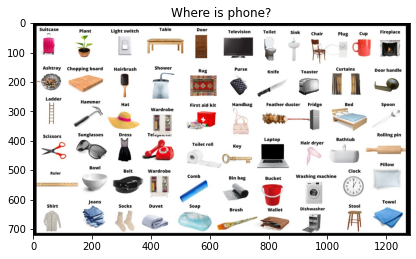

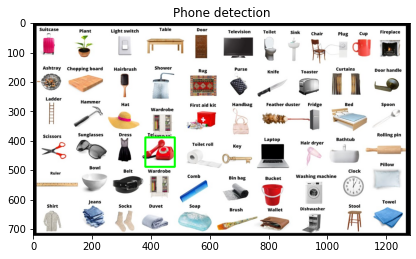

In [30]:
# Load input image and convert to grayscale
image = cv2.imread('Datasets/images/houseitems.jpg') #Asosiy katta rasm
imshow('Where is phone?', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('Datasets/images/cropped_phone.jpg',0)  #topilishi kerak bo'lgan qism, template 
        #rasmlar ikkalasi ham gray bolishi kerak
result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result) #template matchinga doir funksiya 

#Create bbox
top_left = max_loc #rectangle point. Max location bu starting x,y ni beadi
bottom_right = (top_left[0]+100, top_left[1]+100) #50 bbox ending pointni aniqlayapmiz start x,y orqali 50 qoshib
cv2.rectangle(image, top_left, bottom_right, (0,255,0),5)


imshow('Phone detection', image)